Loading the dataset #Independent Data

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/House Price India.csv")

In [ ]:
print(df.columns.values)

['id' 'Date' 'number of bedrooms' 'number of bathrooms' 'living area'
 'lot area' 'number of floors' 'waterfront present' 'number of views'
 'condition of the house' 'grade of the house'
 'Area of the house(excluding basement)' 'Area of the basement'
 'Built Year' 'Renovation Year' 'Postal Code' 'Lattitude' 'Longitude'
 'living_area_renov' 'lot_area_renov' 'Number of schools nearby'
 'Distance from the airport' 'Price']


In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

Price correlation
This allow us to explore labels that are highly correlated to the price.
sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.
Which features are more correlated to the price?

In [ ]:
price_corr = df.corr()['Price'].sort_values(ascending=False)
print(price_corr)

Price                                    1.000000
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
waterfront present                       0.263687
number of floors                         0.262732
Renovation Year                          0.133173
lot area                                 0.081992
lot_area_renov                           0.075535
Built Year                               0.050307
condition of the house                   0.041376
Longitude                                0.024414
Number of schools nearby                 0.009890
Distance from the airport                0.003804


Training the dataset

In [ ]:
X = df.drop('Price',axis=1)

# Label
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10234, 22)
(4386, 22)
(10234,)
(4386,)


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


Creating a model

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Training the model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
80/80 [==============================] - 16s 4ms/step - loss: 425403547648.0000 - val_loss: 425769369600.0000
Epoch 2/400
80/80 [==============================] - 0s 3ms/step - loss: 425290694656.0000 - val_loss: 425388572672.0000
Epoch 3/400
80/80 [==============================] - 0s 3ms/step - loss: 423673593856.0000 - val_loss: 421414797312.0000
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 413634527232.0000 - val_loss: 402245517312.0000
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 378540589056.0000 - val_loss: 346693206016.0000
Epoch 6/400
80/80 [==============================] - 0s 3ms/step - loss: 298673471488.0000 - val_loss: 243379290112.0000
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 191136219136.0000 - val_loss: 147406766080.0000
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 129154883584.0000 - val_loss: 119145947136.0000
Epoch 9/400
80/80 [============

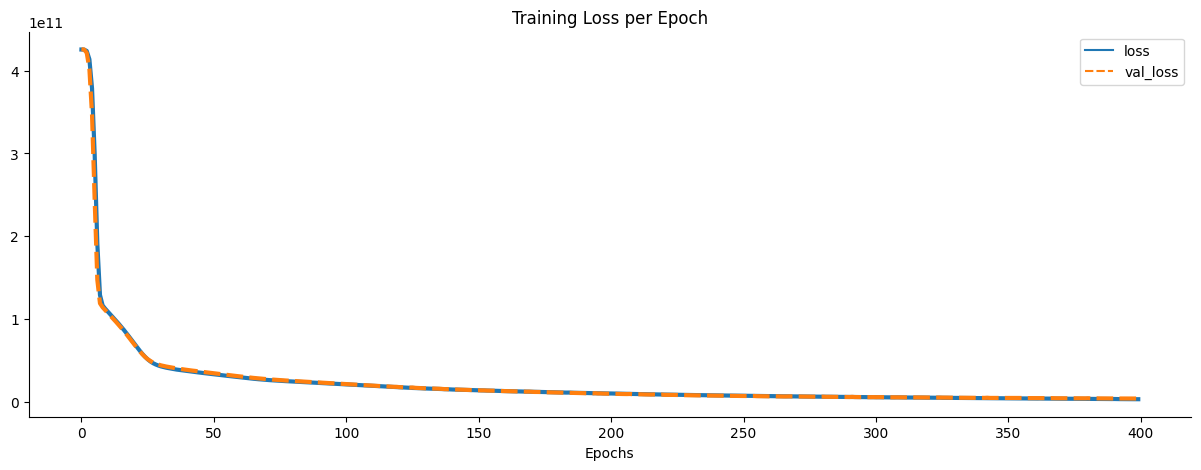

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['Price'].describe())

138/138 [==============================] - 0s 2ms/step
MAE:  17917.356150963293
MSE:  4275050498.533384
RMSE:  65383.870323906216
Variance Regression Score:  0.9682850276736829


Descriptive Statistics:
 count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64


Predicting on a brand new house

In [40]:
# fueatures of new house
single_house = df.drop('Price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 22))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['Price'])

Features of new house:
id                                       6.762810e+09
Date                                     4.249100e+04
number of bedrooms                       5.000000e+00
number of bathrooms                      2.500000e+00
living area                              3.650000e+03
lot area                                 9.050000e+03
number of floors                         2.000000e+00
waterfront present                       0.000000e+00
number of views                          4.000000e+00
condition of the house                   5.000000e+00
grade of the house                       1.000000e+01
Area of the house(excluding basement)    3.370000e+03
Area of the basement                     2.800000e+02
Built Year                               1.921000e+03
Renovation Year                          0.000000e+00
Postal Code                              1.220030e+05
Lattitude                                5.286450e+01
Longitude                               -1.145570e+02
livin

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
